In [92]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
import pingouin as pg
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from pandas import option_context
from scipy.stats import chi2_contingency
from scipy import stats
%matplotlib inline

In [77]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [93]:
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

In [108]:
def custom_style(row):

    color = 'white'
    if row.values[-1] == 'nan':
        color = 'yellow'

    return ['background-color: %s' % color]*len(row.values)


In [3]:
pwd

'C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\t-tests'

In [4]:
all_nodes_packets = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\t-tests\\7_nodes_no-fails_t-test.csv", sep=",")

In [5]:
all_nodes_packets

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
0       7_nodes                 6848                  6872             7000   
1       7_nodes                 6671                  6689             7000   
2   7_nodes_3-f                 5316                  5409             5500   
3   7_nodes_3-f                 5351                  5364             5500   
4       5_nodes                 4917                  4944             5000   
5       5_nodes                 4746                  4785             5000   
6   5_nodes_2-f                 3742                  3775             3800   
7   5_nodes_2-f                 3655                  3673             3800   
8       3_nodes                 2985                  2990             3000   
9       3_nodes                 2986                  2987             3000   
10  3_nodes_1-f                 2464                  2478             2500   
11  3_nodes_1-f                 2242                  2251             2500   

   algorithm  
0       RAFT  
1      Paxos  
2       RAFT  
3      Paxos  
4       RAFT  
5      Paxos  
6       RAFT  
7      Paxos  
8       RAFT  
9      Paxos  
10      RAFT  
11     Paxos

In [6]:
all_nodes_packets['algorithm'].describe()

count       12
unique       2
top       RAFT
freq         6
Name: algorithm, dtype: object

In [7]:
all_nodes_packets

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
0       7_nodes                 6848                  6872             7000   
1       7_nodes                 6671                  6689             7000   
2   7_nodes_3-f                 5316                  5409             5500   
3   7_nodes_3-f                 5351                  5364             5500   
4       5_nodes                 4917                  4944             5000   
5       5_nodes                 4746                  4785             5000   
6   5_nodes_2-f                 3742                  3775             3800   
7   5_nodes_2-f                 3655                  3673             3800   
8       3_nodes                 2985                  2990             3000   
9       3_nodes                 2986                  2987             3000   
10  3_nodes_1-f                 2464                  2478             2500   
11  3_nodes_1-f                 2242                  2251             2500   

   algorithm  
0       RAFT  
1      Paxos  
2       RAFT  
3      Paxos  
4       RAFT  
5      Paxos  
6       RAFT  
7      Paxos  
8       RAFT  
9      Paxos  
10      RAFT  
11     Paxos

In [8]:
all_nodes_packets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   test                  12 non-null     object
 1   goodPacketsReceived   12 non-null     int64 
 2   totalPacketsReceived  12 non-null     int64 
 3   packetsExpected       12 non-null     int64 
 4   algorithm             12 non-null     object
dtypes: int64(3), object(2)
memory usage: 608.0+ bytes


In [9]:
all_nodes_packets.describe()

goodPacketsReceived  totalPacketsReceived  packetsExpected
count            12.000000             12.000000        12.000000
mean           4326.916667           4351.416667      4466.666667
std            1555.377268           1564.655841      1608.688530
min            2242.000000           2251.000000      2500.000000
25%            2985.750000           2989.250000      3000.000000
50%            4244.000000           4280.000000      4400.000000
75%            5324.750000           5375.250000      5500.000000
max            6848.000000           6872.000000      7000.000000

In [10]:
raft = all_nodes_packets[all_nodes_packets['algorithm']=='RAFT']
paxos = all_nodes_packets[all_nodes_packets['algorithm']=='Paxos']


In [11]:
ttest_ind(raft['goodPacketsReceived'], paxos['goodPacketsReceived'])

Ttest_indResult(statistic=0.10995912654804, pvalue=0.9146172039200393)

In [12]:
#important
ttest_rel(raft['goodPacketsReceived'], paxos['goodPacketsReceived'])

Ttest_relResult(statistic=2.4310805314348136, pvalue=0.059301648635045966)

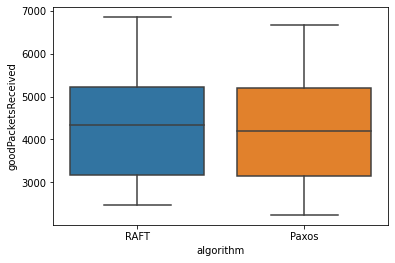

In [13]:
sns.boxplot(x='algorithm', y='goodPacketsReceived', data=all_nodes_packets)
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\goodPacketsReceived_box.png', bbox_inches='tight')

In [14]:
ttest_rel(raft['totalPacketsReceived'], paxos['totalPacketsReceived'])

Ttest_relResult(statistic=3.4319046697184965, pvalue=0.018597234339978685)

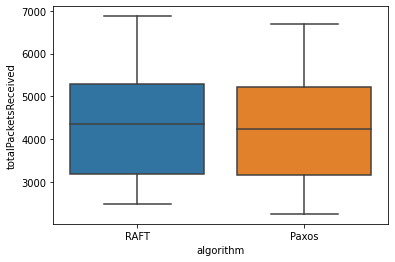

In [15]:
sns.boxplot(x='algorithm', y='totalPacketsReceived', data=all_nodes_packets)
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\totalPacketsReceived_box.png', bbox_inches='tight')

In [16]:
stats.shapiro(raft['totalPacketsReceived'])

ShapiroResult(statistic=0.9641904830932617, pvalue=0.8513810634613037)

In [17]:
stats.shapiro(paxos['totalPacketsReceived'])

ShapiroResult(statistic=0.9780957698822021, pvalue=0.9417102336883545)

In [18]:
stats.shapiro(raft['goodPacketsReceived'])

ShapiroResult(statistic=0.9634072184562683, pvalue=0.8455761075019836)

In [19]:
stats.shapiro(paxos['goodPacketsReceived'])

ShapiroResult(statistic=0.9787519574165344, pvalue=0.9451885223388672)

In [20]:
paxos

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
1       7_nodes                 6671                  6689             7000   
3   7_nodes_3-f                 5351                  5364             5500   
5       5_nodes                 4746                  4785             5000   
7   5_nodes_2-f                 3655                  3673             3800   
9       3_nodes                 2986                  2987             3000   
11  3_nodes_1-f                 2242                  2251             2500   

   algorithm  
1      Paxos  
3      Paxos  
5      Paxos  
7      Paxos  
9      Paxos  
11     Paxos

In [21]:
raft

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
0       7_nodes                 6848                  6872             7000   
2   7_nodes_3-f                 5316                  5409             5500   
4       5_nodes                 4917                  4944             5000   
6   5_nodes_2-f                 3742                  3775             3800   
8       3_nodes                 2985                  2990             3000   
10  3_nodes_1-f                 2464                  2478             2500   

   algorithm  
0       RAFT  
2       RAFT  
4       RAFT  
6       RAFT  
8       RAFT  
10      RAFT

In [22]:
all_packets = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\t-tests\\nodes_t-test_all.csv", sep=",")

In [23]:
raft_all = all_packets[all_packets['algorithm']=='RAFT']
paxos_all = all_packets[all_packets['algorithm']=='Paxos']
noAlg_all = all_packets[all_packets['algorithm']=='noAlg']

In [24]:
#important
ttest_rel(raft_all['goodPacketsReceived'], noAlg_all['goodPacketsReceived'])

Ttest_relResult(statistic=4.0763808386863225, pvalue=0.009573789267406973)

In [25]:
#important
ttest_rel(raft_all['goodPacketsReceived'], paxos_all['goodPacketsReceived'])

Ttest_relResult(statistic=2.4310805314348136, pvalue=0.059301648635045966)

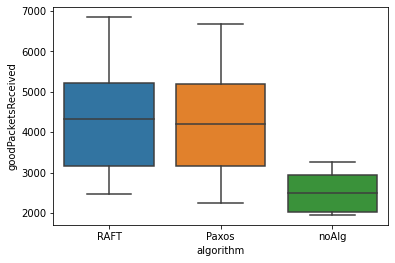

In [26]:
sns.boxplot(x='algorithm', y='goodPacketsReceived', data=all_packets)
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\all_goodPacketsReceived_box.png', bbox_inches='tight')

In [27]:
#important
ttest_rel(raft_all['totalPacketsReceived'], noAlg_all['totalPacketsReceived'])

Ttest_relResult(statistic=4.071465374384539, pvalue=0.009620098526586414)

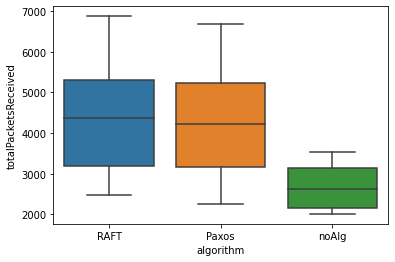

In [28]:
sns.boxplot(x='algorithm', y='totalPacketsReceived', data=all_packets)
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\all_totalPacketsReceived_box.png', bbox_inches='tight')

In [29]:
#important
ttest_rel(raft_all['totalPacketsReceived'], paxos_all['totalPacketsReceived'])

Ttest_relResult(statistic=3.4319046697184965, pvalue=0.018597234339978685)

In [30]:
all_pval = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\t-tests\\p-val_all.csv", sep=",")

In [31]:
all_pval

packets  Raft vs No Algorithm  Raft vs Paxos
0  totalPacketsReceived              0.009620       0.018597
1   goodPacketsReceived              0.009574       0.059302

In [32]:
table = pd.DataFrame.from_dict(all_pval)

In [33]:
table

packets  Raft vs No Algorithm  Raft vs Paxos
0  totalPacketsReceived              0.009620       0.018597
1   goodPacketsReceived              0.009574       0.059302

In [34]:
ttest_rel(paxos_all['totalPacketsReceived'], noAlg_all['totalPacketsReceived'])

Ttest_relResult(statistic=3.811998750663478, pvalue=0.012474571453194354)

In [35]:
ttest_rel(paxos_all['goodPacketsReceived'], noAlg_all['goodPacketsReceived'])

Ttest_relResult(statistic=3.849124224088607, pvalue=0.012011808547935985)

In [36]:
paxos_all

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
1       7_nodes                 6671                  6689             7000   
4   7_nodes_3-f                 5351                  5364             5500   
7       5_nodes                 4746                  4785             5000   
10  5_nodes_2-f                 3655                  3673             3800   
13      3_nodes                 2986                  2987             3000   
16  3_nodes_1-f                 2242                  2251             2500   

   algorithm  
1      Paxos  
4      Paxos  
7      Paxos  
10     Paxos  
13     Paxos  
16     Paxos

In [37]:
noAlg_all

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
2       7_nodes                 3258                  3541             7000   
5   7_nodes_3-f                 2981                  3174             5500   
8       5_nodes                 2812                  3007             5000   
11  5_nodes_2-f                 1996                  2140             3800   
14      3_nodes                 2162                  2227             3000   
17  3_nodes_1-f                 1954                  2012             2500   

   algorithm  
2      noAlg  
5      noAlg  
8      noAlg  
11     noAlg  
14     noAlg  
17     noAlg

In [38]:
raft_all

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
0       7_nodes                 6848                  6872             7000   
3   7_nodes_3-f                 5316                  5409             5500   
6       5_nodes                 4917                  4944             5000   
9   5_nodes_2-f                 3742                  3775             3800   
12      3_nodes                 2985                  2990             3000   
15  3_nodes_1-f                 2464                  2478             2500   

   algorithm  
0       RAFT  
3       RAFT  
6       RAFT  
9       RAFT  
12      RAFT  
15      RAFT

In [57]:
for row in raft_all.itertuples():
    
    print("%s: %f" % (row.test, (row.goodPacketsReceived/row.packetsExpected)*100))
        #print(row)
    

7_nodes: 97.828571
7_nodes_3-f: 96.654545
5_nodes: 98.340000
5_nodes_2-f: 98.473684
3_nodes: 99.500000
3_nodes_1-f: 98.560000


In [62]:
for row in raft_all.itertuples():
    
    print("%s: %f" % (row.test, (row.totalPacketsReceived/row.packetsExpected)*100))

7_nodes: 98.171429
7_nodes_3-f: 98.345455
5_nodes: 98.880000
5_nodes_2-f: 99.342105
3_nodes: 99.666667
3_nodes_1-f: 99.120000


In [60]:
paxos_all

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
1       7_nodes                 6671                  6689             7000   
4   7_nodes_3-f                 5351                  5364             5500   
7       5_nodes                 4746                  4785             5000   
10  5_nodes_2-f                 3655                  3673             3800   
13      3_nodes                 2986                  2987             3000   
16  3_nodes_1-f                 2242                  2251             2500   

   algorithm  
1      Paxos  
4      Paxos  
7      Paxos  
10     Paxos  
13     Paxos  
16     Paxos

In [58]:
for row in paxos_all.itertuples():
    
    print("%s: %f" % (row.test, (row.goodPacketsReceived/row.packetsExpected)*100))

7_nodes: 95.300000
7_nodes_3-f: 97.290909
5_nodes: 94.920000
5_nodes_2-f: 96.184211
3_nodes: 99.533333
3_nodes_1-f: 89.680000


In [63]:
for row in paxos_all.itertuples():
    
    print("%s: %f" % (row.test, (row.totalPacketsReceived/row.packetsExpected)*100))

7_nodes: 95.557143
7_nodes_3-f: 97.527273
5_nodes: 95.700000
5_nodes_2-f: 96.657895
3_nodes: 99.566667
3_nodes_1-f: 90.040000


In [61]:
noAlg_all

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
2       7_nodes                 3258                  3541             7000   
5   7_nodes_3-f                 2981                  3174             5500   
8       5_nodes                 2812                  3007             5000   
11  5_nodes_2-f                 1996                  2140             3800   
14      3_nodes                 2162                  2227             3000   
17  3_nodes_1-f                 1954                  2012             2500   

   algorithm  
2      noAlg  
5      noAlg  
8      noAlg  
11     noAlg  
14     noAlg  
17     noAlg

In [59]:
for row in noAlg_all.itertuples():
    
    print("%s: %f" % (row.test, (row.goodPacketsReceived/row.packetsExpected)*100))

7_nodes: 46.542857
7_nodes_3-f: 54.200000
5_nodes: 56.240000
5_nodes_2-f: 52.526316
3_nodes: 72.066667
3_nodes_1-f: 78.160000


In [64]:
for row in noAlg_all.itertuples():
    
    print("%s: %f" % (row.test, (row.totalPacketsReceived/row.packetsExpected)*100))

7_nodes: 50.585714
7_nodes_3-f: 57.709091
5_nodes: 60.140000
5_nodes_2-f: 56.315789
3_nodes: 74.233333
3_nodes_1-f: 80.480000


In [83]:
all_perc = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\t-tests\\nodes_ratio_all.csv", sep=",")

In [136]:
pd.set_option('precision', 4)
all_perc

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
0       7_nodes                 6848                  6872             7000   
1       7_nodes                 6671                  6689             7000   
2       7_nodes                 3258                  3541             7000   
3   7_nodes_3-f                 5316                  5409             5500   
4   7_nodes_3-f                 5351                  5364             5500   
5   7_nodes_3-f                 2981                  3174             5500   
6       5_nodes                 4917                  4944             5000   
7       5_nodes                 4746                  4785             5000   
8       5_nodes                 2812                  3007             5000   
9   5_nodes_2-f                 3742                  3775             3800   
10  5_nodes_2-f                 3655                  3673             3800   
11  5_nodes_2-f                 1996                  2140             3800   
12      3_nodes                 2985                  2990             3000   
13      3_nodes                 2986                  2987             3000   
14      3_nodes                 2162                  2227             3000   
15  3_nodes_1-f                 2464                  2478             2500   
16  3_nodes_1-f                 2242                  2251             2500   
17  3_nodes_1-f                 1954                  2012             2500   

    %goodPacketsReceived/packetsExpected  \
0                                97.8286   
1                                95.3000   
2                                46.5429   
3                                96.6545   
4                                97.2909   
5                                54.2000   
6                                98.3400   
7                                94.9200   
8                                56.2400   
9                                98.4737   
10                               96.1842   
11                               52.5263   
12                               99.5000   
13                               99.5333   
14                               72.0667   
15                               98.5600   
16                               89.6800   
17                               78.1600   

    %totalPacketsReceived/packetsExpected  %goodPacketLossRate  \
0                                 98.1714               2.1714   
1                                 95.5571               4.7000   
2                                 50.5857              53.4571   
3                                 98.3455               3.3455   
4                                 97.5273               2.7091   
5                                 57.7091              45.8000   
6                                 98.8800               1.6600   
7                                 95.7000               5.0800   
8                                 60.1400              43.7600   
9                                 99.3421               1.5263   
10                                96.6579               3.8158   
11                                56.3158              47.4737   
12                                99.6667               0.5000   
13                                99.5667               0.4667   
14                                74.2333              27.9333   
15                                99.1200               1.4400   
16                                90.0400              10.3200   
17                                80.4800              21.8400   

    %totalPacketLossRate algorithm  
0                 1.8286      RAFT  
1                 4.4429     Paxos  
2                49.4143     noAlg  
3                 1.6545      RAFT  
4                 2.4727     Paxos  
5                42.2909     noAlg  
6                 1.1200      RAFT  
7                 4.3000     Paxos  
8                39.8600     noAlg  
9                 0.6579      RAFT  
10        

In [138]:
pd.set_option('precision', 2)
all_perc[all_perc.test=='3_nodes']

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
12  3_nodes                 2985                  2990             3000   
13  3_nodes                 2986                  2987             3000   
14  3_nodes                 2162                  2227             3000   

    %goodPacketsReceived/packetsExpected  \
12                                 99.50   
13                                 99.53   
14                                 72.07   

    %totalPacketsReceived/packetsExpected  %goodPacketLossRate  \
12                                  99.67                 0.50   
13                                  99.57                 0.47   
14                                  74.23                27.93   

    %totalPacketLossRate algorithm  
12                  0.33      RAFT  
13                  0.43     Paxos  
14                 25.77     noAlg

In [137]:
pd.set_option('precision', 2)
all_perc[all_perc.test=='3_nodes_1-f']

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
15  3_nodes_1-f                 2464                  2478             2500   
16  3_nodes_1-f                 2242                  2251             2500   
17  3_nodes_1-f                 1954                  2012             2500   

    %goodPacketsReceived/packetsExpected  \
15                                 98.56   
16                                 89.68   
17                                 78.16   

    %totalPacketsReceived/packetsExpected  %goodPacketLossRate  \
15                                  99.12                 1.44   
16                                  90.04                10.32   
17                                  80.48                21.84   

    %totalPacketLossRate algorithm  
15                  0.88      RAFT  
16                  9.96     Paxos  
17                 19.52     noAlg

In [139]:
pd.set_option('precision', 2)
all_perc[all_perc.test=='5_nodes']

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
6  5_nodes                 4917                  4944             5000   
7  5_nodes                 4746                  4785             5000   
8  5_nodes                 2812                  3007             5000   

   %goodPacketsReceived/packetsExpected  \
6                                 98.34   
7                                 94.92   
8                                 56.24   

   %totalPacketsReceived/packetsExpected  %goodPacketLossRate  \
6                                  98.88                 1.66   
7                                  95.70                 5.08   
8                                  60.14                43.76   

   %totalPacketLossRate algorithm  
6                  1.12      RAFT  
7                  4.30     Paxos  
8                 39.86     noAlg

In [140]:
pd.set_option('precision', 2)
all_perc[all_perc.test=='5_nodes_2-f']

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
9   5_nodes_2-f                 3742                  3775             3800   
10  5_nodes_2-f                 3655                  3673             3800   
11  5_nodes_2-f                 1996                  2140             3800   

    %goodPacketsReceived/packetsExpected  \
9                                  98.47   
10                                 96.18   
11                                 52.53   

    %totalPacketsReceived/packetsExpected  %goodPacketLossRate  \
9                                   99.34                 1.53   
10                                  96.66                 3.82   
11                                  56.32                47.47   

    %totalPacketLossRate algorithm  
9                   0.66      RAFT  
10                  3.34     Paxos  
11                 43.68     noAlg

In [141]:
pd.set_option('precision', 2)
all_perc[all_perc.test=='7_nodes']

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
0  7_nodes                 6848                  6872             7000   
1  7_nodes                 6671                  6689             7000   
2  7_nodes                 3258                  3541             7000   

   %goodPacketsReceived/packetsExpected  \
0                                 97.83   
1                                 95.30   
2                                 46.54   

   %totalPacketsReceived/packetsExpected  %goodPacketLossRate  \
0                                  98.17                 2.17   
1                                  95.56                 4.70   
2                                  50.59                53.46   

   %totalPacketLossRate algorithm  
0                  1.83      RAFT  
1                  4.44     Paxos  
2                 49.41     noAlg

In [142]:
pd.set_option('precision', 2)
all_perc[all_perc.test=='7_nodes_3-f']

test  goodPacketsReceived  totalPacketsReceived  packetsExpected  \
3  7_nodes_3-f                 5316                  5409             5500   
4  7_nodes_3-f                 5351                  5364             5500   
5  7_nodes_3-f                 2981                  3174             5500   

   %goodPacketsReceived/packetsExpected  \
3                                 96.65   
4                                 97.29   
5                                 54.20   

   %totalPacketsReceived/packetsExpected  %goodPacketLossRate  \
3                                  98.35                 3.35   
4                                  97.53                 2.71   
5                                  57.71                45.80   

   %totalPacketLossRate algorithm  
3                  1.65      RAFT  
4                  2.47     Paxos  
5                 42.29     noAlg

In [81]:
indoor_only_perc = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\t-tests\\nodes_ratio_indoor_only.csv", sep=",")

In [95]:
pd.set_option('precision', 4)
indoor_only_perc.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['%goodPacketLossRate', '%totalPacketLossRate']])

In [96]:
raft_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\raft_outdoor\\raft_3-nodes\\data.csv", sep=",")

In [97]:
raft_data_3_nodes

nodeName packetNumber  temperature  brightness  humidity onBoardTemp
0       \\x00          NaN          NaN         NaN       NaN         NaN
1           1            1         18.0       388.0      54.0          17
2           1            2         17.0       389.0      54.0          17
3           2            1         17.0      1555.0      53.0          16
4           1            3         17.0       384.0      54.0          17
...       ...          ...          ...         ...       ...         ...
2985        3          998         17.0         0.0      61.0          16
2986        2          999         16.0         0.0      60.0          14
2987        3          999         18.0         0.0      62.0          16
2988        2         1000         16.0         0.0      60.0          14
2989        3         1000         17.0         0.0      62.0          16

[2990 rows x 6 columns]

In [102]:
raft_data_3_nodes.head(10)

nodeName packetNumber  \
0                                              \\x00          NaN   
1                                                  1            1   
2                                                  1            2   
3                                                  2            1   
4                                                  1            3   
5  \\x8e\\x0cppL\\x0c\\x0c|\\x92\\x0cr\\xe0\\x0cp...          NaN   
6                                                  1            4   
7                                                  2            2   
8                                                  3            2   
9                                                  1            5   

   temperature  brightness  humidity onBoardTemp  
0          NaN         NaN       NaN         NaN  
1         18.0       388.0      54.0          17  
2         17.0       389.0      54.0          17  
3         17.0      1555.0      53.0          16  
4         17.0       384.0      54.0          17  
5          NaN         NaN       NaN         NaN  
6         17.0       260.0      54.0          17  
7         17.0      1547.0      53.0          16  
8         18.0        91.0      58.0          17  
9         17.0       256.0      54.0          17

In [112]:
raft_data_3_nodes.style.apply(lambda x: ['background: yellow' if x.name in [0,5] 
                              else '' for i in x], 
                   axis=1)

In [113]:
data_dropped = raft_data_3_nodes.drop(labels=[0,5], axis=0)

In [114]:
data_dropped

nodeName packetNumber  temperature  brightness  humidity onBoardTemp
1           1            1         18.0       388.0      54.0          17
2           1            2         17.0       389.0      54.0          17
3           2            1         17.0      1555.0      53.0          16
4           1            3         17.0       384.0      54.0          17
6           1            4         17.0       260.0      54.0          17
...       ...          ...          ...         ...       ...         ...
2985        3          998         17.0         0.0      61.0          16
2986        2          999         16.0         0.0      60.0          14
2987        3          999         18.0         0.0      62.0          16
2988        2         1000         16.0         0.0      60.0          14
2989        3         1000         17.0         0.0      62.0          16

[2988 rows x 6 columns]

In [119]:
data_dropped.iloc[:,0]

1       1
2       1
3       2
4       1
6       1
       ..
2985    3
2986    2
2987    3
2988    2
2989    3
Name: nodeName, Length: 2988, dtype: object

In [125]:
data_dropped.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['nodeName', 'packetNumber']])

In [128]:
failures_nos = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\t-tests\\failures_nos.csv", sep=",")

In [130]:
pd.set_option('precision', 0)
failures_nos

Experiment  1 fail  2 fail  3 fail
0  7 nodes with 3 failures     300     500     700
1  5 nodes with 2 failures     500     700     NaN
2   3 nodes with 1 failure     500     NaN     NaN